In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Create Files_Name
image_data= 'archive/garbage_classification'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,battery
1,biological
2,cardboard
3,clothes
4,glass
5,metal
6,paper
7,plastic
8,shoes
9,trash


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,archive/garbage_classification\glass\white-gla...,garbage_classification\glass
1,archive/garbage_classification\shoes\shoes110.jpg,garbage_classification\shoes
2,archive/garbage_classification\clothes\clothes...,garbage_classification\clothes
3,archive/garbage_classification\metal\metal182.jpg,garbage_classification\metal
4,archive/garbage_classification\battery\battery...,garbage_classification\battery
...,...,...
5178,archive/garbage_classification\trash\trash206.jpg,garbage_classification\trash
5179,archive/garbage_classification\shoes\shoes1098...,garbage_classification\shoes
5180,archive/garbage_classification\battery\battery...,garbage_classification\battery
5181,archive/garbage_classification\biological\biol...,garbage_classification\biological


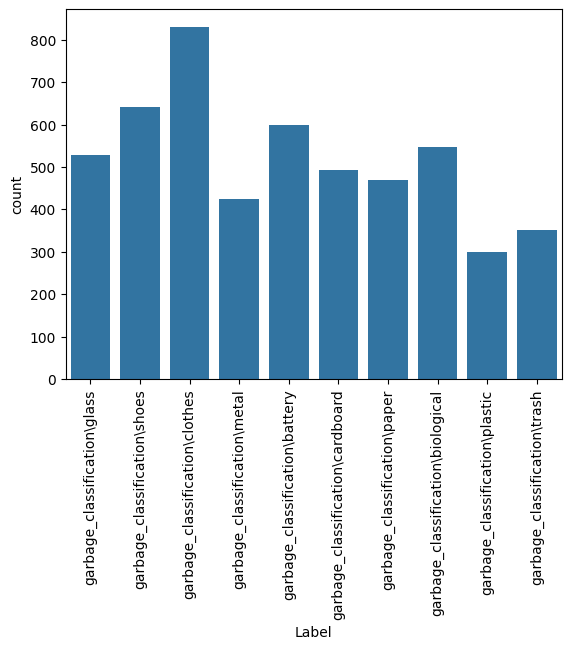

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 90);

In [7]:
train_data_dir =image_data
batch_size = 128
target_size = (224,224)
validation_split = 0.2

In [8]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

Found 5183 files belonging to 10 classes.
Using 4147 files for training.
Found 5183 files belonging to 10 classes.
Using 1036 files for validation.


In [9]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'cardboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash']

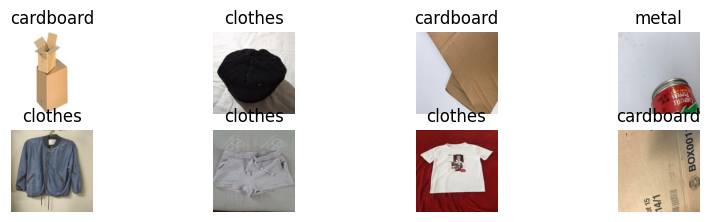

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

\

MODELING


In [12]:
base_model = tf.keras.applications.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(12,activation=tf.nn.softmax))     #12 classes
keras_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b1 (Functional)  │ ?                      │     6,931,124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,931,124 (26.44 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,931,124 (26.44 MB)

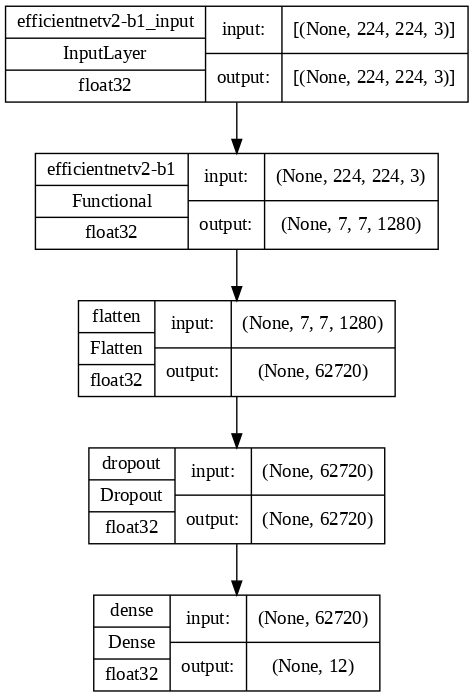

In [ ]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=100)

In [ ]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [ ]:
early_stopping =EarlyStopping(patience=10, restore_best_weights=True)    # patience de 5 para 10

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist=keras_model.fit_generator(train,epochs=10,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/10
33/33 [==============================] - 626s 19s/step - loss: 0.6835 - accuracy: 0.8676 - val_loss: 0.1718 - val_accuracy: 0.9712
Epoch 2/10
33/33 [==============================] - 560s 17s/step - loss: 0.1222 - accuracy: 0.9724 - val_loss: 0.1362 - val_accuracy: 0.9856
Epoch 3/10
33/33 [==============================] - 560s 17s/step - loss: 0.0670 - accuracy: 0.9880 - val_loss: 0.0829 - val_accuracy: 0.9865
Epoch 4/10
33/33 [==============================] - 562s 17s/step - loss: 0.0404 - accuracy: 0.9899 - val_loss: 0.0940 - val_accuracy: 0.9865
Epoch 5/10
33/33 [==============================] - 552s 17s/step - loss: 0.0403 - accuracy: 0.9911 - val_loss: 0.0833 - val_accuracy: 0.9875
Epoch 6/10
33/33 [==============================] - 550s 17s/step - loss: 0.0266 - accuracy: 0.9942 - val_loss: 0.0787 - val_accuracy: 0.9875
Epoch 7/10
33/33 [==============================] - 553s 17s/step - loss: 0.0256 - accuracy: 0.9945 - val_loss: 0.1261 - val_accuracy: 0.9846
Epoch 

In [ ]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

9/9 [==============================] - 103s 11s/step - loss: 0.0600 - accuracy: 0.9885
Test Loss = 0.05995339900255203
Test Accuracy = 0.9884615540504456


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.683525,0.867644,0.171827,0.971154
1,0.122197,0.972376,0.136225,0.985577
2,0.066954,0.987989,0.082889,0.986538
3,0.040372,0.989911,0.094033,0.986538
4,0.040343,0.991112,0.083313,0.987500
5,0.026621,0.994235,0.078670,0.987500
6,0.025573,0.994475,0.126078,0.984615
7,0.019913,0.994715,0.086070,0.988462
8,0.042948,0.993995,0.068853,0.986538
9,0.031306,0.993755,0.059953,0.988462


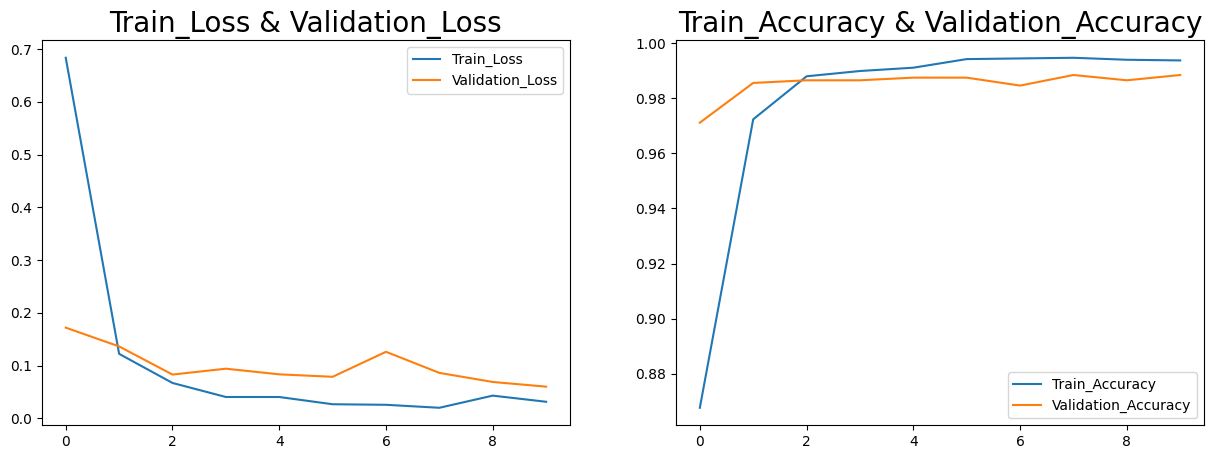

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [ ]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

33/33 [==============================] - 80s 2s/step


,Actual,Prediction
0,1,1
1,8,8
2,8,8
3,1,1
4,4,4
...,...,...
1035,0,0
1036,8,8
1037,8,8
1038,2,2


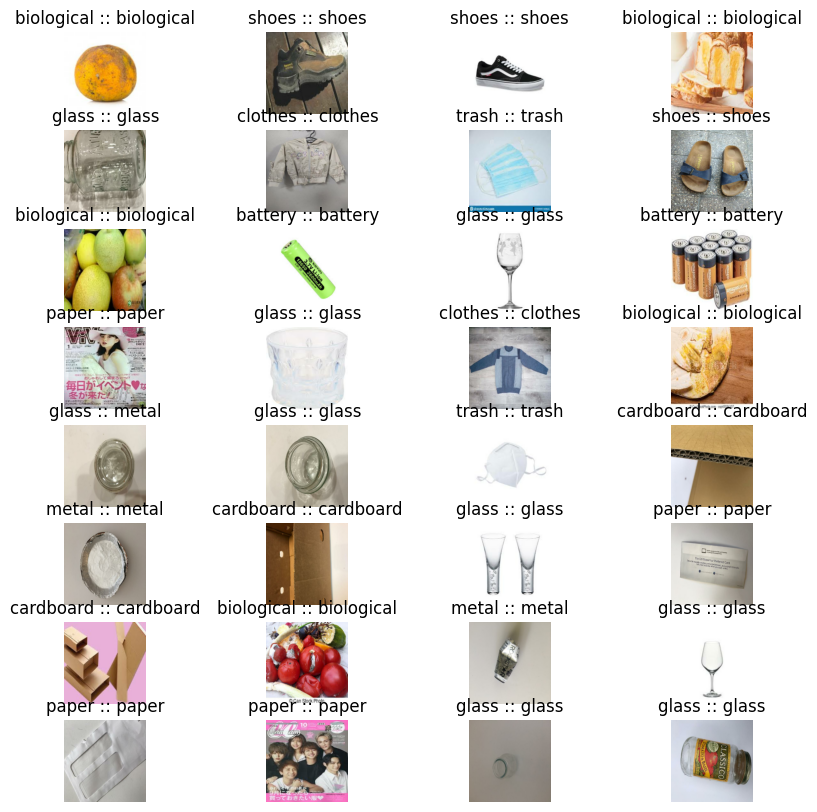

In [ ]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

**CONFUSION MATRIX**

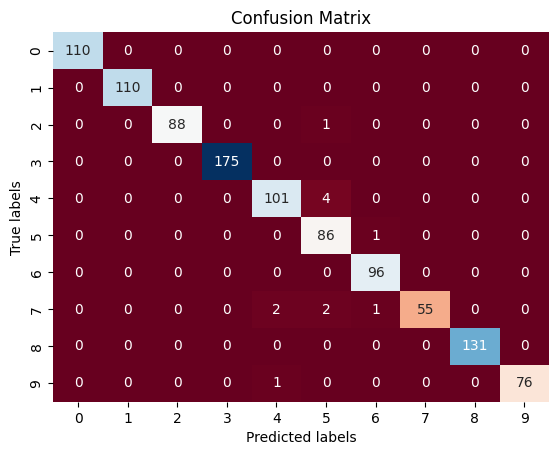

array([[110,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 110,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  88,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0, 175,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 101,   4,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  86,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  96,   0,   0,   0],
       [  0,   0,   0,   0,   2,   2,   1,  55,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 131,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,  76]])

In [ ]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

**Accuracy**

In [ ]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.4f}%".format(Acc * 100))

accuracy is: 98.8462%


In [ ]:
import pickle

In [ ]:
pickle.dump(keras_model,open('/content/model_saved','wb'))

In [ ]:
model_loaded = pickle.load(open('/content/model_saved','rb'))

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential